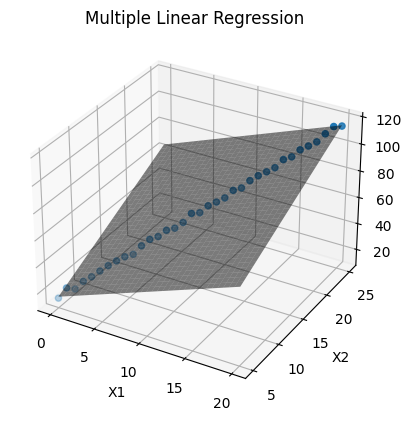

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

random.seed(40)
num_points = 35

# Generate two sets of synthetic data
x1 = np.linspace(0, 20, num_points)
x2 = np.linspace(5, 25, num_points)
y = 2 * x1 + 3 * x2 + 1 + np.random.normal(0, 1, num_points)

X = np.column_stack((x1, x2))
model = LinearRegression().fit(X, y)
predicted_y = model.predict(X)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 'predicted_y': predicted_y})
data.to_csv('linear_regression_data_multi_features.csv', index=False)

x1_mesh, x2_mesh = np.meshgrid(x1, x2)
predicted_y_mesh = model.predict(np.column_stack((x1_mesh.ravel(), x2_mesh.ravel())))
predicted_y_mesh = predicted_y_mesh.reshape(x1_mesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, label='Data')
ax.plot_surface(x1_mesh, x2_mesh, predicted_y_mesh, color='black', alpha=0.5, label='Regression')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression')
plt.show()